In [53]:
import pandas as pd
import numpy as np 
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"

In [54]:
conf ={
    'datapath':'SCFA_normalized.xlsx', ## data should be already normalized and in xlsx format
    'outputfilename':'pca1',
    'group_column':'Converter ', ## Be careful about the spaces (if you have space in your text)
    'num_dim':2, ## number of dimensions for the PCA ,
    'equal_pc_scale': False , ## eqiual ecale of pc1 and pc2 in pca figure
    
    'categories_marker' : {'High':'o','Low':'^','Non':'*'},
    'categories_color' : {'High':'darkgoldenrod', 'Low':'khaki', 'Non':'darkcyan'},
    
    'marker_size':25,
    'fontsize':12,
    'figsize':(5,4),
    'dpi':600,
    
    'title':'Title',
#     'xlabel':'xlabel',
#     'ylabel':'ylabel',
    
    ## arrow properties 
    'topn':5, # number of features to be displayed in the pca figure
    'ratio': 0.2, # ratio of the actual length of the feature vector to be shown in the figure
    'width': 0.00010,
    'head_width' : 0.018,
    'head_length' : 0.015,
    'text_fontsize': 6
}


In [55]:
## loead data

data = pd.read_excel(conf['datapath'],header=0,index_col = 0)

groups = dict(data[conf['group_column']])
data.drop(columns=[conf['group_column']],inplace= True)

In [56]:
def plot_data(x,groups, model):
    plt.clf()
    groups = list(groups.values())
    labels=[]
    s = conf['marker_size'] 
    
    plt.figure(figsize= conf['figsize'])
    
    for i in range(len(x)):
        
        m = conf['categories_marker'][groups[i]]
        clr = conf['categories_color'][groups[i]]
        label = groups[i]

        if label not in labels:
            labels.append(label)
            plt.scatter(x[i,0], x[i,1], c = 'white', edgecolors= clr, s = s, marker = m, label = label )
        else :
            plt.scatter(x[i,0], x[i,1], c = 'white', edgecolors= clr, s = s, marker = m)

    plt.title(conf['title'], fontsize = conf['fontsize'])
    
    plt.xlabel(f"PC1 ({np.around(model.explained_variance_ratio_[0],decimals = 2)})", labelpad = 0.1)
    plt.ylabel(f"PC2 ({np.around(model.explained_variance_ratio_[1],decimals = 2)})", labelpad = 0.1)

    plt.legend(fontsize = conf['fontsize'] - 2, loc = 'center left',bbox_to_anchor = (1,0.5))
    if conf['equal_pc_scale'] :  plt.axis('equal') 
    
    plt.savefig(conf['outputfilename'] + '.png', facecolor = 'white', dpi = conf['dpi'], bbox_inches = 'tight')
    plt.savefig(conf['outputfilename'] + '.pdf', facecolor = 'white', dpi = conf['dpi'], bbox_inches = 'tight')
    


def extract_important_features(pca_components, features, topn=5):
    
    s = pd.Series(index = range(len(pca_components)))
    fea_dict = {}
    
    for i in range(len(pca_components)):
        s[i] = np.sqrt(np.sum(pca_components[i]**2))
        
    sorted_s = s.sort_values(ascending= False)
    
    ss = pd.Series(index= features[sorted_s.index[:]])
    ss[:] = sorted_s
    
    return  sorted_s
    
def plot_features(pca_components,features,conf, arrow_label= True):
    ratio = conf['ratio']
    topn = conf['topn']
    
    sorted_s = extract_important_features(pca_components, features, topn = 5)
    
    for i in range(len(pca_components)):
        if i not in sorted_s[:topn] : continue

    
        v = (pca_components[i][:2]*ratio/np.linalg.norm(pca_components[i][:2]*ratio))*0.003

        plt.arrow(0, 0, pca_components[i,0]*ratio, pca_components[i,1]*ratio,
                  width = conf['width'] , color='gray', alpha=0.6, overhang=0.5,
                  head_width = conf['head_width'], head_length = conf['head_length'])

        if arrow_label :
            plt.text(pca_components[i,0]*ratio +v[0],pca_components[i,1]*ratio + v[1],
                 features[i],fontsize = conf['text_fontsize'], weight='bold', color="seagreen")
    
    plt.savefig(conf['outputfilename'] + f'_features{"" if arrow_label else "_nolabel" }.png', facecolor = 'white', dpi = conf['dpi'], bbox_inches = 'tight')
    plt.savefig(conf['outputfilename'] + f'_features{"" if arrow_label else "_nolabel" }.pdf', facecolor = 'white', dpi = conf['dpi'], bbox_inches = 'tight')
    
    return sorted_s

def pca(data,groups):
    
    model = PCA(n_components=conf['num_dim'])
#     df.dropna(inplace =True)
    data_transfomrmed = model.fit_transform(data)
    pca_components = model.components_.T
    
    print(np.shape(data_transfomrmed),np.shape(pca_components),np.shape(data))
    return data_transfomrmed , pca_components, model



(29, 2) (98, 2) (29, 98)


/var/folders/br/2lln08pn3cj8cxk8qs5jy5100000gn/T/ipykernel_27393/1058701936.py:36: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(index = range(len(pca_components)))
/var/folders/br/2lln08pn3cj8cxk8qs5jy5100000gn/T/ipykernel_27393/1058701936.py:44: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ss = pd.Series(index= features[sorted_s.index[:]])
/var/folders/br/2lln08pn3cj8cxk8qs5jy5100000gn/T/ipykernel_27393/1058701936.py:36: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(index = range(len(pca_components)))
/var/folders/br/2lln08pn3cj8cxk8qs5jy5100000gn/T/ipykernel_27393/1058701936.py:44: DeprecationWa

<Figure size 432x288 with 0 Axes>

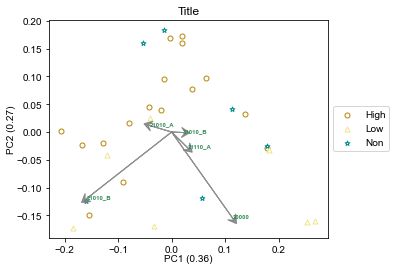

In [57]:

data_transfomrmed , pca_components, model  = pca(data,groups)

plot_data(data_transfomrmed,groups, model)
plot_features(pca_components,data.columns,conf.copy(), arrow_label= False)
sorted_s = plot_features(pca_components,data.columns,conf.copy())

data_r = data.copy()
data_r['group'] = list(groups.values())
data_r.to_csv('data_R.csv')

In [47]:
## this shows unique categories you have in your data
set(groups.values())

{'High', 'Low', 'Non'}

In [72]:
data

,hexNac,hexose,Fucosylation,Sialation,Sulfation
Sampel ID,,,,,
P001-B,1.032819,0.928026,0.140287,0.795180,0.011346
P002-B,1.031868,0.784156,0.037158,0.609579,0.039372
P003-B,1.031868,0.877255,0.124629,0.747042,0.018071
P004-B,1.042332,0.985690,0.036708,0.595003,0.008086
P005-B,1.037576,0.882469,0.275040,0.627840,0.046424
P006-B,1.033295,0.650331,0.134452,0.417654,0.054389
P007-B,1.019977,1.017205,0.183014,0.779201,0.071411
P008-B,1.027111,0.839246,0.143008,0.684444,0.033551
P009-B,1.029965,0.829251,0.088184,0.671625,0.047387
